# Used Car Price Prediction:

Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Used_Cars.xlsx')

In [3]:
df.head()

,Unnamed: 0,Name,engine,kilometers,car_type,Year,location,Car_price
0,0,Maruti Wagon R,Petrol,"1,31,125 kms",Manual,2014,ahmedabad,2.94 Lakh
1,1,Hyundai Grand i10,Petrol,"73,875 kms",Manual,2015,ahmedabad,4.8 Lakh
2,2,Volkswagen Vento,Diesel,"97,922 kms",Manual,2018,ahmedabad,7.11 Lakh
3,3,Maruti S-Presso,Petrol,"24,230 kms",Manual,2019,ahmedabad,4.22 Lakh
4,4,Maruti Wagon R,Petrol,"41,174 kms",Automatic,2017,ahmedabad,4.3 Lakh


In [5]:
df.tail()

,Unnamed: 0,Name,engine,kilometers,car_type,Year,location,Car_price
7431,7431,Hyundai i20,Petrol,"34,986 kms",Manual,2017,kolkata,3.75 Lakh
7432,7432,Hyundai i20,Petrol,"57,000 kms",Manual,2012,kolkata,2.55 Lakh
7433,7433,Honda City,Petrol,"4,602 kms",Manual,2021,kolkata,12.49 Lakh
7434,7434,Maruti Alto 800,Petrol,"10,000 kms",Manual,2016,kolkata,2.8 Lakh
7435,7435,Hyundai Xcent,Petrol,"40,000 kms",Manual,2015,kolkata,3.85 Lakh


In [6]:
df.sample()

,Unnamed: 0,Name,engine,kilometers,car_type,Year,location,Car_price
4548,4548,Maruti Swift,Petrol,"23,372 kms",Manual,2017,gurgaon,4.4 Lakh


# EDA

In [8]:
df = df.drop(['Unnamed: 0'],axis=1)

In [9]:
df.shape

(7436, 7)

In [10]:
df.columns

Index(['Name', 'engine', 'kilometers', 'car_type', 'Year', 'location',
       'Car_price'],
      dtype='object')

In [11]:
df

,Name,engine,kilometers,car_type,Year,location,Car_price
0,Maruti Wagon R,Petrol,"1,31,125 kms",Manual,2014,ahmedabad,2.94 Lakh
1,Hyundai Grand i10,Petrol,"73,875 kms",Manual,2015,ahmedabad,4.8 Lakh
2,Volkswagen Vento,Diesel,"97,922 kms",Manual,2018,ahmedabad,7.11 Lakh
3,Maruti S-Presso,Petrol,"24,230 kms",Manual,2019,ahmedabad,4.22 Lakh
4,Maruti Wagon R,Petrol,"41,174 kms",Automatic,2017,ahmedabad,4.3 Lakh
...,...,...,...,...,...,...,...
7431,Hyundai i20,Petrol,"34,986 kms",Manual,2017,kolkata,3.75 Lakh
7432,Hyundai i20,Petrol,"57,000 kms",Manual,2012,kolkata,2.55 Lakh
7433,Honda City,Petrol,"4,602 kms",Manual,2021,kolkata,12.49 Lakh
7434,Maruti Alto 800,Petrol,"10,000 kms",Manual,2016,kolkata,2.8 Lakh


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7436 entries, 0 to 7435
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        7436 non-null   object
 1   engine      7436 non-null   object
 2   kilometers  7436 non-null   object
 3   car_type    7436 non-null   object
 4   Year        7436 non-null   int64 
 5   location    7436 non-null   object
 6   Car_price   7436 non-null   object
dtypes: int64(1), object(6)
memory usage: 406.8+ KB


In [16]:
df.isnull().sum()

Name          0
engine        0
kilometers    0
car_type      0
Year          0
location      0
Car_price     0
dtype: int64

dataset contains no null values so can proceed with further analysis

In [17]:
collist = df.columns.values

for i in collist:
    print(f"value count of {i} is {df[i].value_counts()}\n")

value count of Name is Maruti Swift               423
Hyundai i20                413
Hyundai Grand i10          357
Maruti Swift Dzire         275
Honda City                 274
                          ... 
Mercedes-Benz GLC Coupe      1
Porsche Macan                1
Toyota Vellfire              1
Porsche 718                  1
Tata Indica Xeta             1
Name: Name, Length: 251, dtype: int64

value count of engine is Petrol      4105
Diesel      3272
CNG           27
LPG           25
Electric       7
Name: engine, dtype: int64

value count of kilometers is 60,000 kms    90
65,000 kms    80
70,000 kms    79
40,000 kms    78
80,000 kms    77
              ..
85,850 kms     1
98,422 kms     1
74,064 kms     1
92,500 kms     1
4,602 kms      1
Name: kilometers, Length: 3338, dtype: int64

value count of car_type is Manual       5706
Automatic    1730
Name: car_type, dtype: int64

value count of Year is 2018    968
2016    920
2017    912
2015    859
2014    714
2013    646
2019    5

In [14]:
df.dtypes

Name          object
engine        object
kilometers    object
car_type      object
Year           int64
location      object
Car_price     object
dtype: object

We can convert 'Year' column to age_of_car by subtracting present year to Years in the Year column

In [18]:
df['Year'] = 2022-df['Year']
df['Year']

0        8
1        7
2        4
3        3
4        5
        ..
7431     5
7432    10
7433     1
7434     6
7435     7
Name: Year, Length: 7436, dtype: int64

In [19]:
# removing kms in kilometers column

df['kilometers'] = df['kilometers'].str.split(' ',expand=True)[0]
df['kilometers'] = df['kilometers'].str.replace(',','')

In [20]:
df['kilometers']

0       131125
1        73875
2        97922
3        24230
4        41174
         ...  
7431     34986
7432     57000
7433      4602
7434     10000
7435     40000
Name: kilometers, Length: 7436, dtype: object

In [21]:
#removing lakh from price column

df['Car_price'] = df['Car_price'].str.split(' ',expand=True)[0]
df['Car_price'] = df['Car_price'].str.replace(',','')
df['Car_price']

0        2.94
1         4.8
2        7.11
3        4.22
4         4.3
        ...  
7431     3.75
7432     2.55
7433    12.49
7434      2.8
7435     3.85
Name: Car_price, Length: 7436, dtype: object

As kilometers and price is of object type we can convet to numeric

In [22]:
df['kilometers'] = pd.to_numeric(df['kilometers'])
df['Car_price'] = pd.to_numeric(df['Car_price'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7436 entries, 0 to 7435
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        7436 non-null   object 
 1   engine      7436 non-null   object 
 2   kilometers  7436 non-null   int64  
 3   car_type    7436 non-null   object 
 4   Year        7436 non-null   int64  
 5   location    7436 non-null   object 
 6   Car_price   7436 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 406.8+ KB


splitting numeric and categorical columns

In [24]:
col = df.columns
num_col = df._get_numeric_data().columns
cat_col = list(set(col)-set(num_col))
cat_col

['Name', 'engine', 'location', 'car_type']

# visualization:

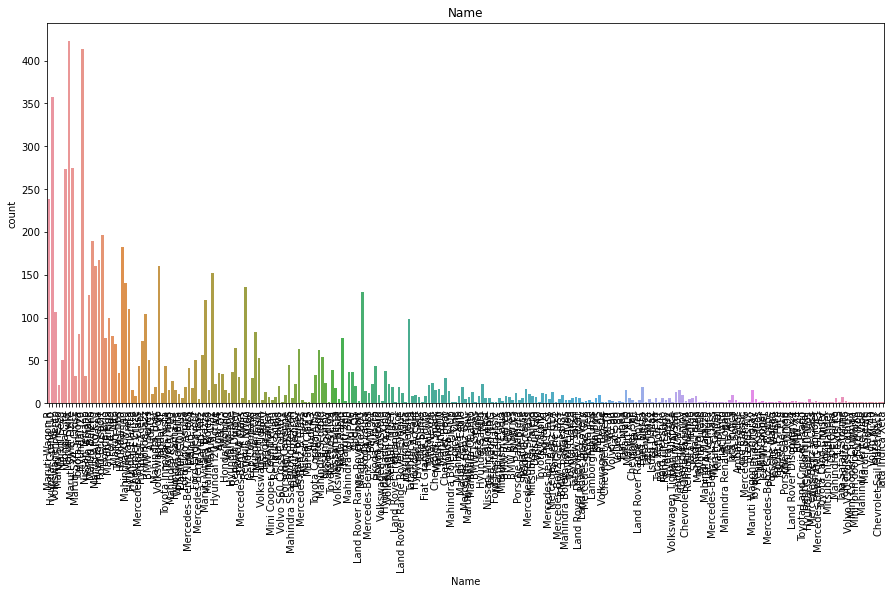

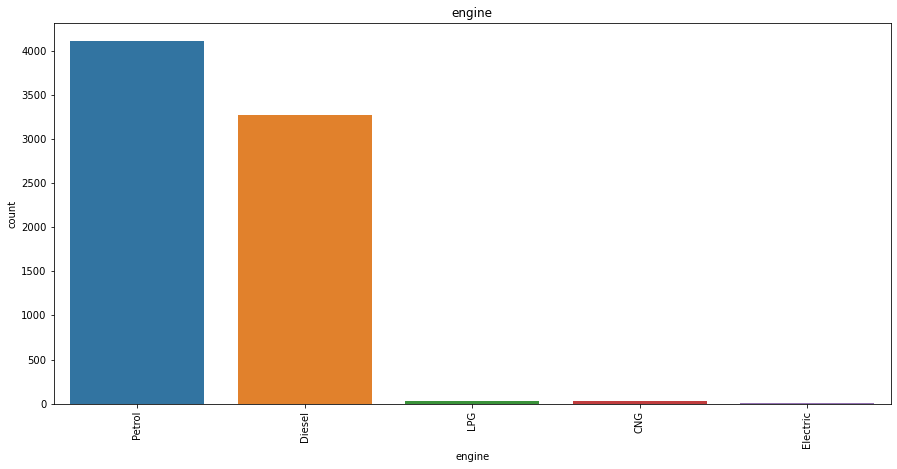

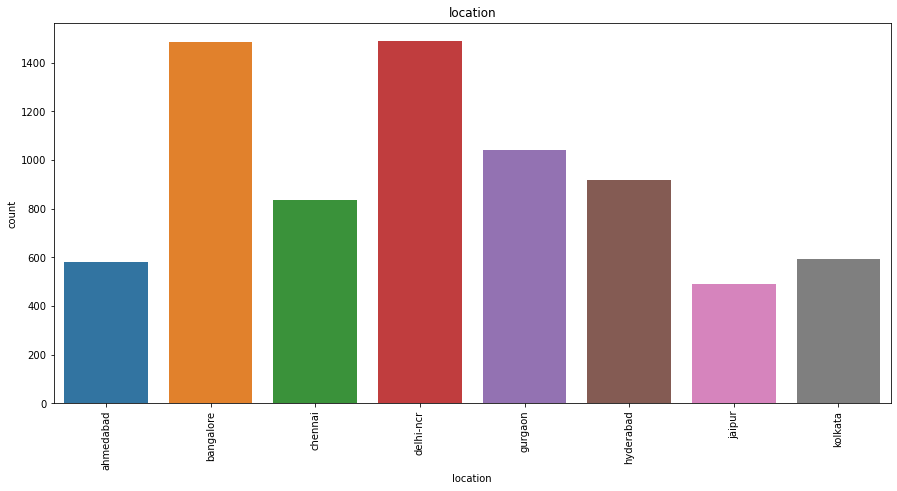

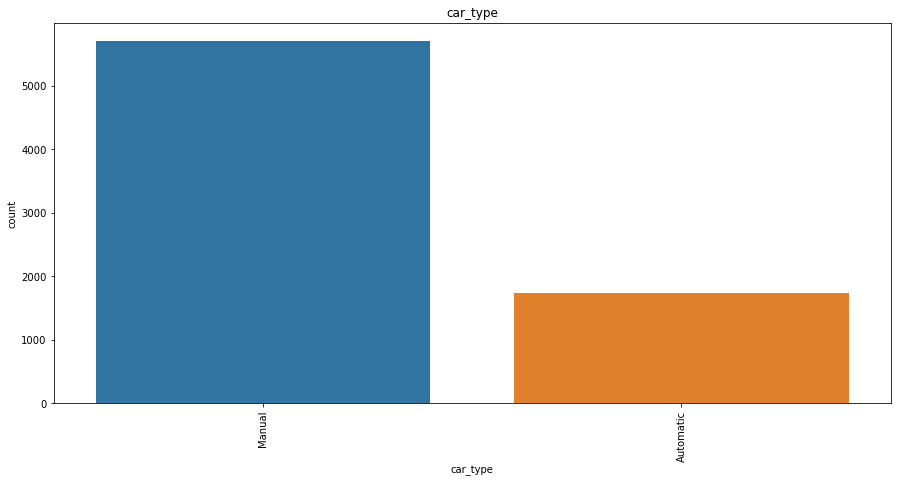

In [25]:
for i in cat_col:
    plt.figure(figsize=(15,7))
    sns.countplot(x=df[i],data=df)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

Key Observations:

1. Petrol engine cars are more sold for high price compared to other engine type, followed by diesel engine cars and the lowest running type is electric.
2. Manual cars are sold in large amount compared to automatic cars.
3. In our dataset, Bangalore and Delhi-NCR locations sees hig sell of used cars followed by Gurgaon, Jaipur sees less amount of used cars selling.



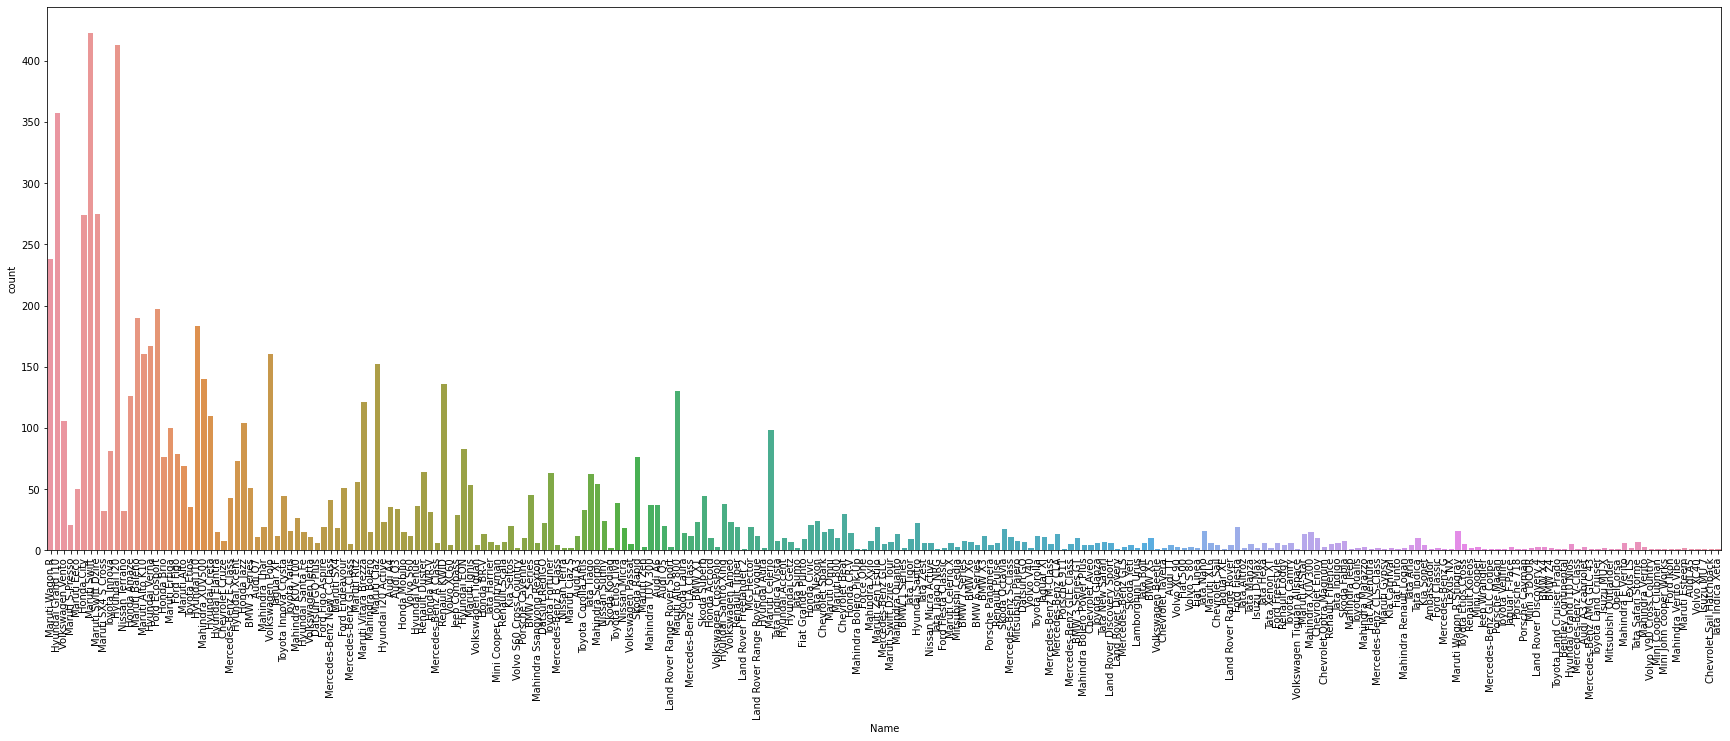

In [27]:
plt.figure(figsize=(30,10))
sns.countplot(df['Name'])
plt.xticks(rotation=90)
plt.show()

Key Observations:
    
    1. Maruti swift followed by Hyundai i20 are sold more followed by Maruti WagonR. Least sold brands are Minicoper, Cheverolet.

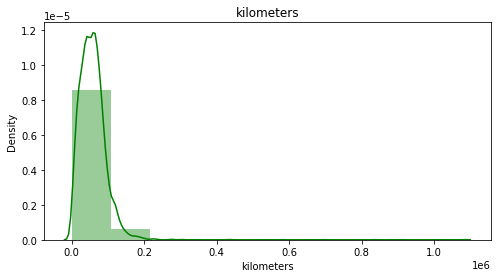

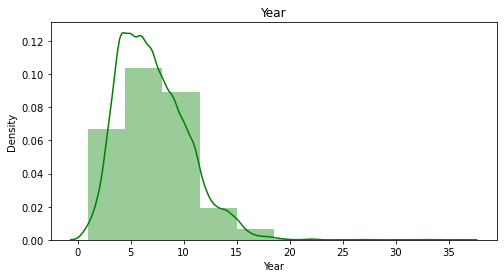

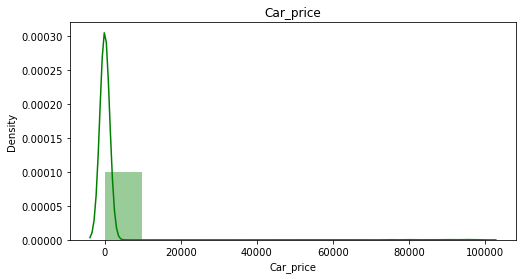

In [28]:
#Distribution plot for all numerical columns
for i in num_col:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

we can see all columns data is right skewed

# Data Preprocessing

Now lets convert categorical column to numeric using label encoder

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])

# Describe

In [31]:
df.describe()

,Name,engine,kilometers,car_type,Year,location,Car_price
count,7436.000000,7436.000000,7.436000e+03,7436.000000,7436.000000,7436.000000,7436.000000
mean,114.151425,2.660167,5.798613e+04,0.767348,7.112292,3.159629,727.249110
std,60.827432,1.493507,3.967350e+04,0.422551,3.223135,2.024116,7678.633735
min,0.000000,0.000000,1.000000e+00,0.000000,1.000000,0.000000,1.000000
25%,66.000000,1.000000,3.300000e+04,1.000000,5.000000,1.000000,3.570000
50%,121.000000,4.000000,5.500000e+04,1.000000,7.000000,3.000000,5.260000
75%,141.000000,4.000000,7.603675e+04,1.000000,9.000000,5.000000,7.757500
max,250.000000,4.000000,1.080000e+06,1.000000,36.000000,7.000000,99000.000000


Key Observation:
    
1. There is large difference between 75% and max in 'Year', 'Name' which means outliers are present
2. And skewness is present in 'engine' column

# correlation

In [32]:
df.corr()

,Name,engine,kilometers,car_type,Year,location,Car_price
Name,1.000000,-0.031145,0.058345,0.056410,-0.021791,0.002526,0.012467
engine,-0.031145,1.000000,-0.296896,0.070350,-0.007187,0.001574,0.044462
kilometers,0.058345,-0.296896,1.000000,0.084784,0.427007,-0.003996,0.068147
car_type,0.056410,0.070350,0.084784,1.000000,0.124063,0.095950,0.051040
Year,-0.021791,-0.007187,0.427007,0.124063,1.000000,-0.016128,0.212522
location,0.002526,0.001574,-0.003996,0.095950,-0.016128,1.000000,0.059526
Car_price,0.012467,0.044462,0.068147,0.051040,0.212522,0.059526,1.000000


<AxesSubplot:>

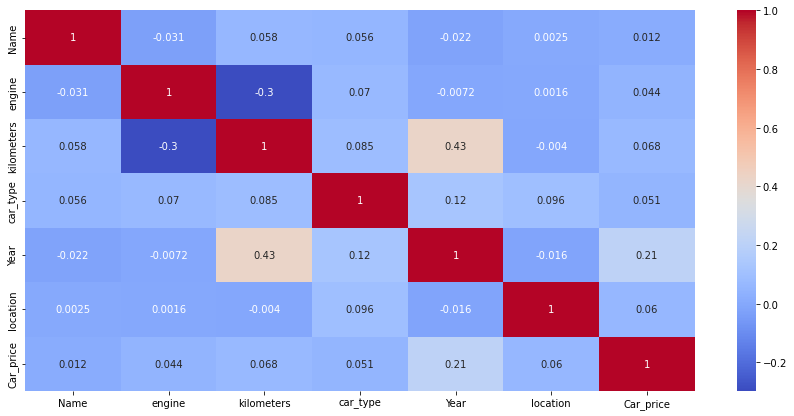

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Key Observations:
    
1. All the columns in dataset are positively correlated with target column

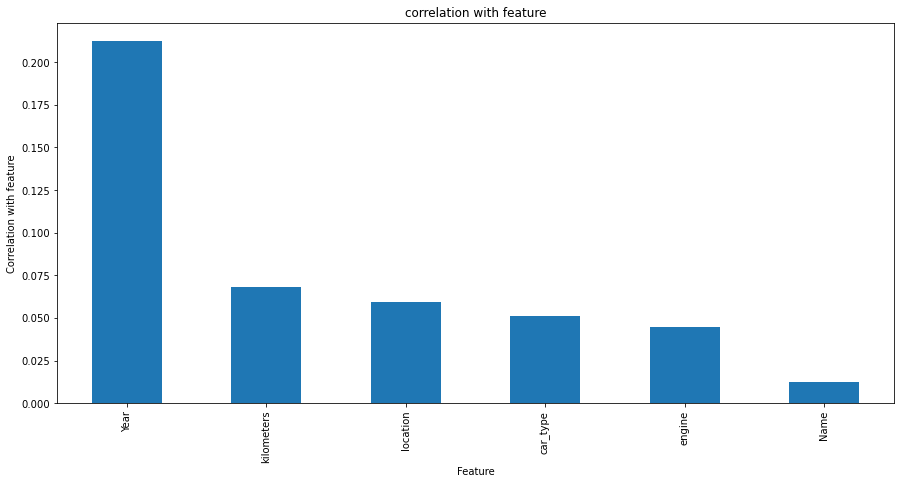

In [34]:
plt.figure(figsize=(15,7))
df.corr()['Car_price'].sort_values(ascending=False).drop(['Car_price']).plot.bar()
plt.xlabel('Feature')
plt.ylabel("Correlation with feature")
plt.title("correlation with feature")
plt.show()

Key Observation:
    
1. 'Year' is highly correlated with Price which means if the ad=ge of car is less the price of car selling is also increases.
2. 'Kilometers' driven is less then price also increases. Which ia also positively correlated with price column.
3. 'Location' also contribute highly in deciding the price od used car, followed by 'car_type', 'engine', 'name'

# Skewness:

In [35]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
x.skew()

Name          0.409952
engine       -0.226457
kilometers    6.365220
car_type     -1.265742
Year          0.844961
location      0.272110
dtype: float64

keeping +/- 0.5 as skew value we can sind skewness present in 'car_type'

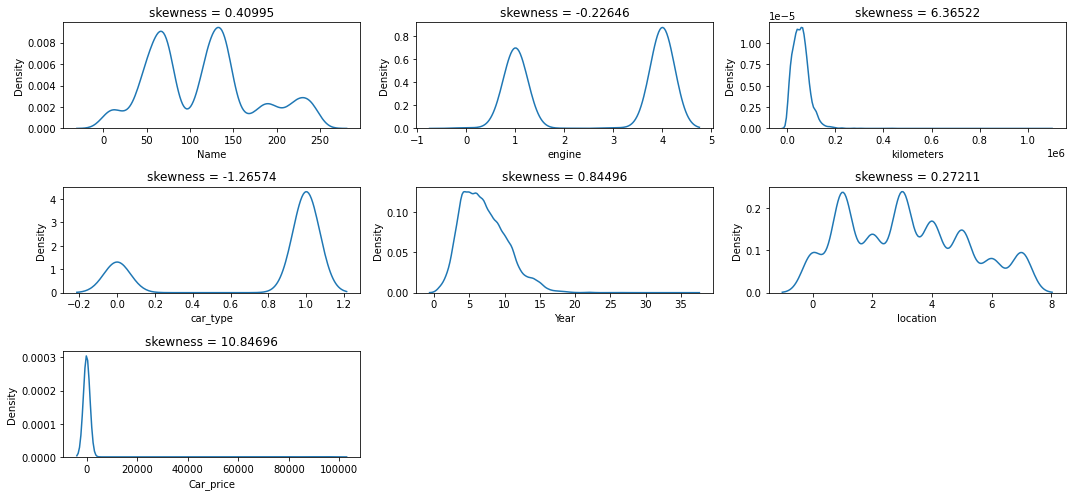

In [37]:
collist = df.columns.values
plt.figure(figsize=(15,7))
for i in range(0,len(collist)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness = {round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

Key Observations:
    
Skewness is present in 'Name', 'engine', 'kilometers', 'car_type', 'Year' columns

It can be removed by power transform method

In [38]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[ 0.53219788,  0.89659376,  1.7365195 ,  0.55062657,  0.40855311,
        -1.83614096],
       [-0.73156346,  0.89659376,  0.59197009,  0.55062657,  0.10799061,
        -1.83614096],
       [ 1.8450958 , -1.11019792,  1.12003038,  0.55062657, -0.99827203,
        -1.83614096],
       ...,
       [-0.95299983,  0.89659376, -2.31644883,  0.55062657, -2.78147037,
         1.67993693],
       [ 0.2160493 ,  0.89659376, -1.80638469,  0.55062657, -0.22109781,
         1.67993693],
       [-0.59781055,  0.89659376, -0.3644524 ,  0.55062657,  0.10799061,
         1.67993693]])

In [40]:
x = pd.DataFrame((x_new),columns=x.columns)

# Detecting Outliers:

Name             AxesSubplot(0.125,0.657941;0.227941x0.222059)
engine        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
kilometers    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
car_type         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Year          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
location      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

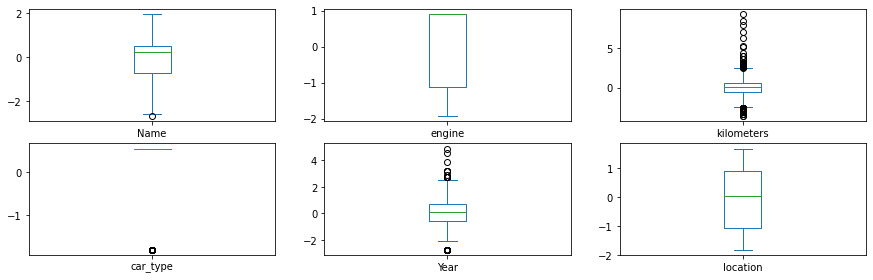

In [41]:
x.plot(kind='box',subplots='True',layout=(3,3),figsize=(15,7))

Outliers are present in 'kilometers' , 'car_type', 'Year'

# Removing Outliers:

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
x_new = df[(z<3).all(axis=1)]

In [43]:
print("Old DataFrame : ",x.shape[0])
print("New DataFrame : ",x_new.shape[0])
print("Rows Dropped : ",x.shape[0]-x_new.shape[0])

Old DataFrame :  7436
New DataFrame :  7393
Rows Dropped :  43


In [44]:
percentage_loss = (7436-7393)/7436*100
percentage_loss

0.5782678859601936

loss is very less 0.57% so we can drop these rows with outliers

# Scaling Data

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x),columns = x.columns)

# Multicolinearity

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.020932,Name
1,1.201099,engine
2,1.773739,kilometers
3,1.051874,car_type
4,1.558833,Year
5,1.010570,location


all vif values are less tha 5 so no multicolinearity is present.

# Training the model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [48]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=i,test_size=.30)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_y = lr.predict(x_test)
    temp = r2_score(y_test,pred_y)
    if temp>acc:
        acc = temp
        best_rstate = i
print("Accuracy_Score : ",acc*100,"Random_State : ",best_rstate)

Accuracy_Score :  5.009357823980842 Random_State :  708


In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=.30)

In [51]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
lr = LinearRegression()
la = Lasso()
ri = Ridge()
el = ElasticNet()
kn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()
gr = GradientBoostingRegressor()
etr = ExtraTreesRegressor()
model = [lr,la ,ri,el,kn,dtr,svr,rfr,ada,gr,etr]

In [53]:
score = []
mean_squared_err = []
mean_absolute_err =[]
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score of ",m, " is ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
   
    
    print("Mean Squared error : ",mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Absolute Error : ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score : ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print('\n\n')

Accuracy Score of  LinearRegression()  is  0.038776559410836464
Mean Squared error :  31640962.31956183
Mean Absolute Error :  1800.7541801487776
R2 Score :  0.01901098563328385



Accuracy Score of  Lasso()  is  0.03877644758882015
Mean Squared error :  31639031.283813372
Mean Absolute Error :  1799.6709257083407
R2 Score :  0.019070855015145716



Accuracy Score of  Ridge()  is  0.03877655699433524
Mean Squared error :  31640609.095377415
Mean Absolute Error :  1800.5388196286099
R2 Score :  0.019021936913495185



Accuracy Score of  ElasticNet()  is  0.034212281875037664
Mean Squared error :  31401820.925836664
Mean Absolute Error :  1508.3772847202868
R2 Score :  0.026425269616034197



Accuracy Score of  KNeighborsRegressor()  is  0.4283337529319927
Mean Squared error :  30769948.381106973
Mean Absolute Error :  729.3346122814881
R2 Score :  0.04601569858590604



Accuracy Score of  DecisionTreeRegressor()  is  0.9999999999413345
Mean Squared error :  37442408.8310265
Mean Absolut

# Cross Validation:

In [54]:
mean_score = []
std = []

for m in model:
    CV = cross_val_score(m,x,y,cv=5)
    print("Score of ", m ," is ", CV)
    print("Mean score is : ",CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is : ",CV.std())
    std.append(CV.std())
    print('\n')

Score of  LinearRegression()  is  [-0.0385512   0.02383937 -0.03940274  0.00828827  0.02062571]
Mean score is :  -0.005040118403806537
Standard Deviation is :  0.028192866986832


Score of  Lasso()  is  [-0.03825487  0.02388898 -0.03930388  0.00833286  0.02053204]
Mean score is :  -0.004960974744678137
Standard Deviation is :  0.028095757549029647


Score of  Ridge()  is  [-0.03850965  0.02384009 -0.03938193  0.00829423  0.02061962]
Mean score is :  -0.00502752839330074
Standard Deviation is :  0.028177516840744963


Score of  ElasticNet()  is  [ 0.0079623   0.02366574 -0.01200191  0.01481686  0.00947543]
Mean score is :  0.008783684509380784
Standard Deviation is :  0.011756438352992686


Score of  KNeighborsRegressor()  is  [-0.00321379 -0.06356115 -0.04189242  0.1353953   0.15783778]
Mean score is :  0.03691314518556772
Standard Deviation is :  0.09190981834504193


Score of  DecisionTreeRegressor()  is  [-0.298922   -1.68586933 -1.29714581  0.00563464 -0.05964471]
Mean score is :  

# HyperTuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
dt = DecisionTreeRegressor(random_state=42)

In [63]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
  
}

In [64]:
grid_search = GridSearchCV(estimator=dt, 
                            param_grid=params, 
                            cv=7, verbose=1)

In [65]:
grid_search.fit(X,y)

Fitting 7 folds for each of 25 candidates, totalling 175 fits


GridSearchCV(cv=7, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=1)

In [66]:
pred = grid_search.best_estimator_

# Saving best model

In [67]:
import pickle
file = open('used_car_price_prediction.pkl','wb')
pickle.dump(pred,file)